# Astrophysics example: simulate Planck data

In [3]:
# This cells gives formatting to the images embedded in this Notebook
from IPython.core.display import HTML
HTML("""
<style>
img[alt=image] { width: 300px; }
</style>
""");

## The Planck satellite

[Planck](http://www.esa.int/Our_Activities/Space_Science/Planck_overview) is a Space Mission by the European Space Agency in collaboration with NASA. Its purpose is to measure the Cosmic Microwave Background; the relic radiation, originated just 300,000 years after the Big Bang, is a pillar in understanding how the Universe was born and how it evolved into its current state.

In this Notebook we will create a simulation of the Planck data using advanced functionalities of `pandas`.
![image](http://www.esa.int/var/esa/storage/images/esa_multimedia/images/2009/03/planck_being_prepared_for_tests/9836424-3-eng-GB/Planck_being_prepared_for_tests.jpg)

In [4]:
import pandas as pd

## Load a map created by the Planck satellite

The Planck satellite has several frequency channels between 30 GHz and 857 GHz, let's choose one of the middle channels which are the cleanest channels to investigate the Cosmic Microwave Background: 70 GHz.

I prepared a dataset from the official Planck 70 GHz map located at <http://irsa.ipac.caltech.edu/data/Planck/release_2/all-sky-maps/>, you can download it from **TODO** figshare address

Let's use `!` to execute a shell command (`ls`) in the current folder to check that the file is available:

In [5]:
!ls planck*

planck_70GHz_map.hdf5


### HDF5

[`HDF5`](https://en.wikipedia.org/wiki/Hierarchical_Data_Format) is a binary file format extremely efficient in storing scientific data. It is very convenient because it stores also metadata about the file content and can have a hierarchical structure. It is currently the more efficient general purpose file format in terms of space (it supports several compression algorithms) and reading speed (it also supports parallel access on Supercomputers).

The first advanced `pandas` feature is reading and writing `pd.Series` and `pd.DataFrames` to `HDF5` with `read_hdf` and `to_hdf`.

Let's read the map from `HDF5` into a `pandas` object:

In [6]:
planck_map = pd.read_hdf("planck_70GHz_map.hdf5")

In [7]:
type(planck_map)

pandas.core.series.Series

The more portable way to save a `pd.DataFrame` to disk is `HDF5`,  `pickle` instead does not always work the same way on different platforms, `CSV` is text-based so it is an option only for small datasets.

It is a `pd.Series`, in fact it is only 1 column of data: **Temperature of the sky in Kelvin degrees**, let's inspect this object:

In [8]:
planck_map.shape

(64800,)

It is 500 thousand points, but how are those points organized?

`pandas` objected are organized with their `index`, which is a label attached to every data point.

In [9]:
type(planck_map.index)

pandas.indexes.multi.MultiIndex

In [10]:
planck_map.head()

latitude  longitude
-90       -180        -0.002445
          -179        -0.002445
          -178        -0.002445
          -177        -0.002445
          -176        -0.002445
Name: temperature, dtype: float64

In [11]:
planck_map.tail()

latitude  longitude
90        176          0.002535
          177          0.002535
          178          0.002535
          179          0.002535
          180          0.002474
Name: temperature, dtype: float64

In [12]:
planck_map.index.names

FrozenList(['latitude', 'longitude'])

In [13]:
planck_map.index.levshape

(180, 360)

### Hierarchical indexing

The second advance feature of `pandas` is `pd.MultiIndex`, it is a way to setup a hierarchical indexing, in this case we have a rectangular grid of latitudes and longitudes with sizes:

In [14]:
list(zip(planck_map.index.names, planck_map.index.levshape))

[('latitude', 180), ('longitude', 360)]

in Galactic coordinates (latitude 0 is the Galactic Plane). For each value of latitude, for example 15 degrees above the Galactic plane, we have longitudes running from -180 to 180 degrees:

In [15]:
planck_map.loc[15]

longitude
-180    0.001039
-179    0.001005
-178    0.001014
-177    0.001047
-176    0.001105
-175    0.001087
-174    0.001007
-173    0.001211
-172    0.001247
-171    0.001424
-170    0.001403
-169    0.001521
-168    0.001375
-167    0.001469
-166    0.001515
-165    0.001635
-164    0.001451
-163    0.001373
-162    0.001719
-161    0.001561
-160    0.001652
-159    0.001637
-158    0.001540
-157    0.001865
-156    0.001710
-155    0.001871
-154    0.001576
-153    0.001823
-152    0.001929
-151    0.002113
          ...   
 151   -0.000094
 152   -0.000079
 153   -0.000116
 154   -0.000261
 155    0.000051
 156    0.000020
 157   -0.000165
 158    0.000056
 159    0.000154
 160    0.000269
 161    0.000267
 162    0.000403
 163    0.000114
 164    0.000356
 165    0.000481
 166    0.000233
 167    0.000425
 168    0.000550
 169    0.000424
 170    0.000510
 171    0.000741
 172    0.000532
 173    0.000618
 174    0.000773
 175    0.000707
 176    0.001059
 177    0.000955
 178

#### MultiIndex example

Let's build a simpler example to play with a `pd.Series` with `pd.MultiIndex`, here we start from a list of tuples where we spell out all combinations of the 2 levels of our index:

In [16]:
sample_multiindex = pd.MultiIndex.from_tuples([("A", 1), ("A", 2), ("A", 3), ("B", 2), ("B", 3)], names=["letters", "numbers"])

Now we create a simple dataset with integers between 100 and 105 with this index:

In [17]:
sample_series_with_multiindex = pd.Series(list(range(100, 105)),index=sample_multiindex)

In [18]:
sample_series_with_multiindex

letters  numbers
A        1          100
         2          101
         3          102
B        2          103
         3          104
dtype: int64

If we want to select a data point, we need to specify a value for both levels of the index:

In [19]:
sample_series_with_multiindex[("B", 2)]

103

We can use the levels for grouping purposes:

In [20]:
sample_series_with_multiindex.groupby(level="letters").max()

letters
A    102
B    104
dtype: int64

In [21]:
sample_series_with_multiindex.groupby(level="numbers").max()

numbers
1    100
2    103
3    104
dtype: int64

## Plot slices of the dataset

**TODO** after the main part

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

## Plot a map of the sky



In [23]:
map_2d = planck_map.unstack()

In [24]:
map_2d.head()

longitude,-180,-179,-178,-177,-176,-175,-174,-173,-172,-171,...,171,172,173,174,175,176,177,178,179,180
latitude,,,,,,,,,,,,,,,,,,,,,
-90,-0.002445,-0.002445,-0.002445,-0.002445,-0.002445,-0.002445,-0.002445,-0.002445,-0.002445,-0.002445,...,-0.002387,-0.002387,-0.002387,-0.002387,-0.002387,-0.002387,-0.002387,-0.002387,-0.002387,-0.002445
-89,-0.002723,-0.002627,-0.002627,-0.002627,-0.002627,-0.002683,-0.002683,-0.002683,-0.002683,-0.002557,...,-0.002698,-0.002567,-0.002567,-0.002567,-0.002567,-0.002664,-0.002664,-0.002664,-0.002664,-0.002723
-88,-0.002693,-0.002695,-0.002695,-0.002675,-0.002675,-0.002680,-0.002680,-0.002521,-0.002521,-0.002638,...,-0.002731,-0.002780,-0.002780,-0.002689,-0.002689,-0.002821,-0.002821,-0.002801,-0.002801,-0.002693
-87,-0.002645,-0.002660,-0.002613,-0.002796,-0.002796,-0.002665,-0.002522,-0.002603,-0.002603,-0.002570,...,-0.002512,-0.002576,-0.002576,-0.002648,-0.002651,-0.002655,-0.002655,-0.002743,-0.002618,-0.002645
-86,-0.002335,-0.002325,-0.002317,-0.002469,-0.002349,-0.002359,-0.002326,-0.002436,-0.002333,-0.002366,...,-0.002482,-0.002398,-0.002357,-0.002563,-0.002448,-0.002582,-0.002495,-0.002340,-0.002472,-0.002335


### Unstacking

In [25]:
map_2d.shape

(180, 360)

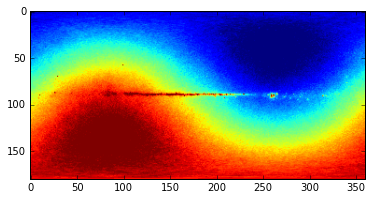

In [26]:
plt.imshow(map_2d, vmin=-3e-3, vmax=3e-3);

In [27]:
latitude, longitude = planck_map.index.levels

In [28]:
map_2d.flatten().shape

AttributeError: 'DataFrame' object has no attribute 'flatten'

In [ ]:
longitude

In [29]:
import numpy as np

NameError: name 'l' is not defined

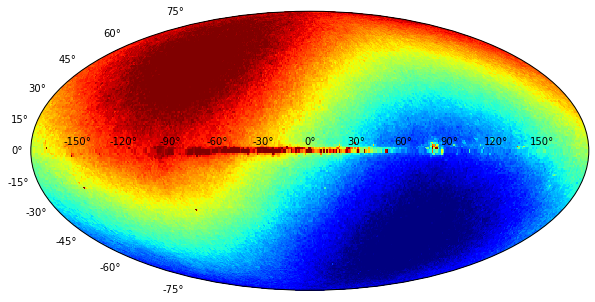

In [30]:
fig = plt.figure(figsize=(10,20))

ax = fig.add_subplot(111, projection="mollweide")

vmax = 3e-3
vmin = -3e-3

plt.pcolormesh(np.radians(longitude), np.radians(latitude), map_2d, vmin=vmin, vmax=vmax);
ax.plot(l, b, '.')

## Generate timelines

In [31]:
ecliptic_to_galactic = np.array([[-0.054882486, -0.993821033, -0.096476249],
                   [ 0.494116468, -0.110993846,  0.862281440],
                   [-0.867661702, -0.000346354,  0.497154957]])

In [32]:
ecliptic_plane_vec = np.zeros([3, 360])

In [33]:
angle = np.linspace(0, 2*np.pi, 360)
ecliptic_plane_vec[0, :] = np.cos(angle)
ecliptic_plane_vec[1, :] = np.sin(angle)

In [34]:
ecliptic_plane_vec = np.zeros([3, 360*360])

for each of the 360 pointing periods we have 360 points to rotate around that axis.

those are 180 with -90 and 180 with +90

In [35]:
lon_axis = np.repeat(np.linspace(0, 2*np.pi, 360), 360)
lon = lon_axis - np.tile(np.concatenate([np.ones(180)*np.pi/2, -np.ones(180)*np.pi/2]), 360)
lat = np.tile(np.linspace(-np.pi/2, np.pi/2, 180), 360*2)

In [36]:
    theta,phi = np.pi/2.-lat,lon
    ct,st,cp,sp = np.cos(theta),np.sin(theta),np.cos(phi),np.sin(phi)
    vec = np.empty((3, ct.size), np.float64)
    ecliptic_plane_vec[0, :] = st * cp
    ecliptic_plane_vec[1, :] = st * sp
    ecliptic_plane_vec[2, :] = ct

In [37]:
ecliptic_plane_vec_in_galactic = ecliptic_to_galactic.dot(ecliptic_plane_vec)

In [38]:
ecliptic_plane_vec_in_galactic

array([[ 0.09647625,  0.11390285,  0.13129436, ..., -0.13129436,
        -0.11390285, -0.09647625],
       [-0.86228144, -0.86020071, -0.85785502, ...,  0.85785502,
         0.86020071,  0.86228144],
       [-0.49715496, -0.49707231, -0.49683656, ...,  0.49683656,
         0.49707231,  0.49715496]])

In [39]:
b = np.pi/2 - np.arccos(ecliptic_plane_vec_in_galactic[2]) 
l = np.arctan2(ecliptic_plane_vec_in_galactic[1], ecliptic_plane_vec_in_galactic[0])

In [40]:
np.degrees(l.min())

-179.99041092847531

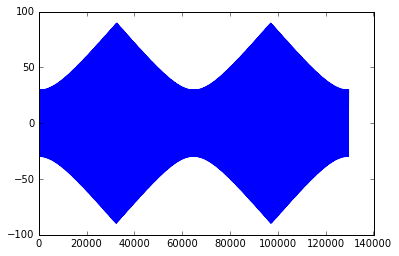

In [41]:
plt.plot(np.degrees(b))

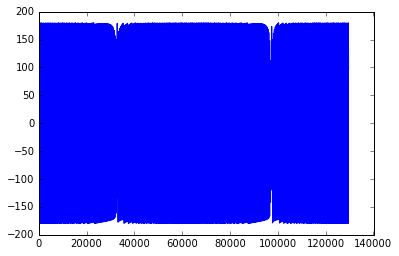

In [42]:
plt.plot(np.degrees(l))

In [43]:
from ipywidgets import interact

In [44]:
def create_scanning_ring_figure(num):
    fig = plt.figure(figsize=(10,20))

    ax = fig.add_subplot(111, projection="mollweide")
    section = slice(360*num, 360*(num+1))
    plt.plot(l[section], b[section], '.')

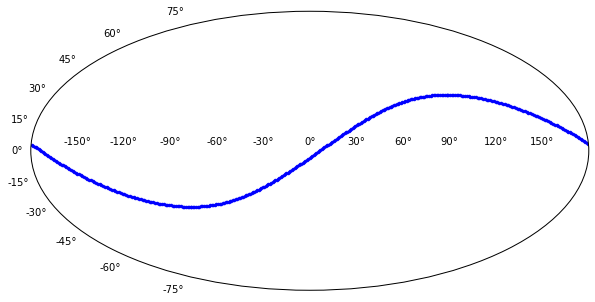

In [45]:
create_scanning_ring_figure(0)

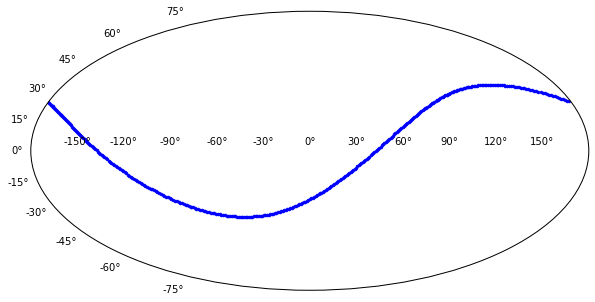

In [46]:
create_scanning_ring_figure(20)

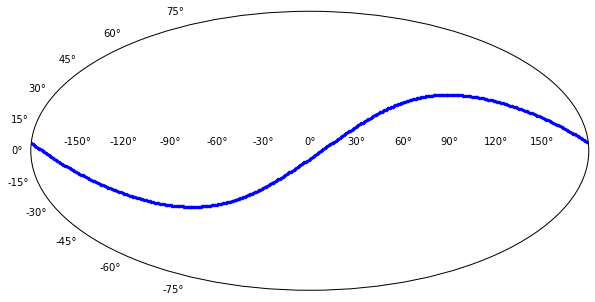

In [47]:
interact(create_scanning_ring_figure, num=(0,360));

In [48]:
l

array([-1.45937485, -1.43914792, -1.41892524, ...,  1.72266742,
        1.70244474,  1.68221781])

In [49]:
b

array([-0.52031671, -0.52022146, -0.51994978, ...,  0.51994978,
        0.52022146,  0.52031671])

In [230]:
map_2d

longitude,-180,-179,-178,-177,-176,-175,-174,-173,-172,-171,...,171,172,173,174,175,176,177,178,179,180
latitude,,,,,,,,,,,,,,,,,,,,,
-90,-0.002445,-0.002445,-0.002445,-0.002445,-0.002445,-0.002445,-0.002445,-0.002445,-0.002445,-0.002445,...,-0.002387,-0.002387,-0.002387,-0.002387,-0.002387,-0.002387,-0.002387,-0.002387,-0.002387,-0.002445
-89,-0.002723,-0.002627,-0.002627,-0.002627,-0.002627,-0.002683,-0.002683,-0.002683,-0.002683,-0.002557,...,-0.002698,-0.002567,-0.002567,-0.002567,-0.002567,-0.002664,-0.002664,-0.002664,-0.002664,-0.002723
-88,-0.002693,-0.002695,-0.002695,-0.002675,-0.002675,-0.002680,-0.002680,-0.002521,-0.002521,-0.002638,...,-0.002731,-0.002780,-0.002780,-0.002689,-0.002689,-0.002821,-0.002821,-0.002801,-0.002801,-0.002693
-87,-0.002645,-0.002660,-0.002613,-0.002796,-0.002796,-0.002665,-0.002522,-0.002603,-0.002603,-0.002570,...,-0.002512,-0.002576,-0.002576,-0.002648,-0.002651,-0.002655,-0.002655,-0.002743,-0.002618,-0.002645
-86,-0.002335,-0.002325,-0.002317,-0.002469,-0.002349,-0.002359,-0.002326,-0.002436,-0.002333,-0.002366,...,-0.002482,-0.002398,-0.002357,-0.002563,-0.002448,-0.002582,-0.002495,-0.002340,-0.002472,-0.002335
-85,-0.002513,-0.002538,-0.002476,-0.002442,-0.002529,-0.002293,-0.002420,-0.002319,-0.002243,-0.002239,...,-0.002379,-0.002275,-0.002379,-0.002408,-0.002343,-0.002595,-0.002644,-0.002714,-0.002620,-0.002513
-84,-0.002475,-0.002425,-0.002371,-0.002325,-0.002375,-0.002330,-0.002238,-0.002319,-0.002299,-0.002287,...,-0.002421,-0.002370,-0.002454,-0.002487,-0.002472,-0.002492,-0.002595,-0.002434,-0.002533,-0.002475
-83,-0.002549,-0.002563,-0.002318,-0.002344,-0.002296,-0.002079,-0.002141,-0.002126,-0.002235,-0.002314,...,-0.002495,-0.002613,-0.002477,-0.002558,-0.002528,-0.002601,-0.002515,-0.002495,-0.002629,-0.002549
-82,-0.002512,-0.002519,-0.002388,-0.002523,-0.002509,-0.002494,-0.002431,-0.002484,-0.002455,-0.002432,...,-0.002679,-0.002605,-0.002587,-0.002477,-0.002511,-0.002497,-0.002468,-0.002495,-0.002505,-0.002512


In [232]:
map_2d.size

64800

In [247]:
360*180

64800

In [241]:
l.min(), l.max()

(-3.1414252927194779, 3.1415518147478485)

In [242]:
b.min(), b.max()

(-1.5664933249117152, 1.566493324911741)

In [51]:
pixelated_map = planck_map.reset_index()

In [52]:
pixelated_map.index.name = "pixel"

In [53]:
pixelated_map.head()

,latitude,longitude,temperature
pixel,,,
0,-90,-180,-0.002445
1,-90,-179,-0.002445
2,-90,-178,-0.002445
3,-90,-177,-0.002445
4,-90,-176,-0.002445


In [55]:
index_into_each_row = (np.degrees(l) + 180).astype(np.int)

In [56]:
index_into_each_row.max()

359

In [57]:
column = (np.degrees(b)+90).astype(np.int)

In [58]:
column.max()

179

In [67]:
pd.MultiIndex.from_arrays(np.repeat(np.))

In [59]:
pix = column * 360 + index_into_each_row

In [60]:
pix.min()

83

In [61]:
pix.max()

64731

In [70]:
len(rng)

365

In [71]:
rng = pd.date_range('13/8/2009', periods=360, freq='D')

In [84]:
ringsets_index = pd.MultiIndex.from_arrays([rng.repeat(360), pix], names=["date","pixel"])

In [80]:
f = pd.Series(1, index=ringsets_index)

In [82]:
f.tail()

2010-08-07  43121    1
            43119    1
            43118    1
            43117    1
            43116    1
dtype: int64

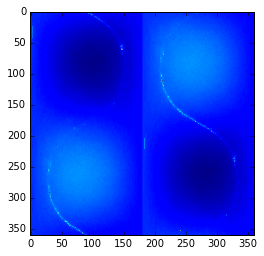

In [259]:
plt.imshow(map_2d.values.flatten()[pix].reshape((360,-1)))

In [1]:
pixelated_map = pd.Series(map_2d.values.flatten())

NameError: name 'pd' is not defined

In [73]:
len(pix)/360

360.0

In [85]:
p = pixelated_map.reindex(ringsets_index, level="pixel")

In [86]:
p

latitude  longitude  temperature
date       pixel                                  
2009-08-13 21696       -30        -84     0.000796
           21697       -30        -83     0.000773
           21698       -30        -82     0.000702
           21699       -30        -81     0.000723
           21701       -30        -79     0.000587
           21702       -30        -78     0.000788
           21703       -30        -77     0.000675
           21704       -30        -76     0.000694
           21705       -30        -75     0.000609
           21706       -30        -74     0.000594
           21707       -30        -73     0.000611
           21709       -30        -71     0.000675
           21710       -30        -70     0.000650
           22071       -29        -69     0.000645
           22072       -29        -68     0.000603
           22073       -29        -67     0.000633
           22074       -29        -66     0.000566
           22075       -29        -65     0.000666
           22077       -29        -63     0.000697
           22078       -29        -62     0.000356
           22439       -28        -61     0.000471
           22440       -28        -60     0.000359
           22441       -28        -59     0.000526
           22442       -28        -58     0.000512
           22803       -27        -57     0.000315
           22804       -27        -56     0.000574
           22805       -27        -55     0.000439
           22806       -27        -54     0.000410
           23168       -26        -52     0.000500
           23169       -26        -51     0.000502
...                    ...        ...          ...
2010-08-07 41709        26        130    -0.000292
           41708        26        129    -0.000543
           42066        27        127    -0.000365
           42065        27        126    -0.000425
           42064        27        125    -0.000499
           42063        27        124    -0.000482
           42422        28        123    -0.000362
           42421        28        122    -0.000418
           42420        28        121    -0.000526
           42419        28        120    -0.000434
           42778        29        119    -0.000479
           42777        29        118    -0.000447
           42775        29        116    -0.000502
           42774        29        115    -0.000328
           42773        29        114    -0.000499
           42772        29        113    -0.000549
           42771        29        112    -0.000496
           43130        30        111    -0.000622
           43129        30        110    -0.000474
           43127        30        108    -0.000519
           43126        30        107    -0.000449
           43125        30        106    -0.000662
           43124        30        105    -0.000581
           43123        30        104    -0.000397
           43122        30        103    -0.000443
           43121        30        102    -0.000485
           43119        30        100    -0.000517
           43118        30         99    -0.000417
           43117        30         98    -0.000636
           43116        30         97    -0.000637

[129600 rows x 3 columns]

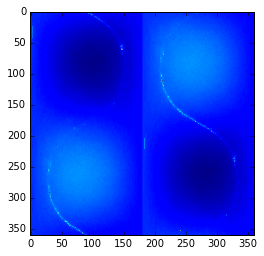

In [64]:
plt.imshow(p.temperature.reshape(360,-1))

In [65]:
len(p)

129600

In [87]:
p.head()

latitude  longitude  temperature
date       pixel                                  
2009-08-13 21696       -30        -84     0.000796
           21697       -30        -83     0.000773
           21698       -30        -82     0.000702
           21699       -30        -81     0.000723
           21701       -30        -79     0.000587

In [88]:
p.temperature.unstack()

ValueError: Index contains duplicate entries, cannot reshape